# ECON323 Final Project - 2K Rating and On-court Performance

The project is posted public at https://github.com/huichengying/NBA2K-Rating.git

## Introduciton

I have played NBA 2K for many yeas and have always been interested in how players' ratings relate to their actual performances. In this project, I will build a dataset containing players' 2K ratings and their performances (various indexes on a per game basis) in the past 5 seasons to discover the relationship via visualization and regression.

## Reference

https://towardsdatascience.com/web-scraping-nba-2k-data-d7fdd4c8898c (learn how to web scrap) 

https://hoopshype.com/nba2k/2021-2022/ (website where I did web scrapping for ratings)

https://www.basketball-reference.com/leagues/NBA_2021_per_game.html (download existing player performance data)

https://stackoverflow.com/questions/64853894/how-to-annotate-points-in-a-scatterplot-based-on-a-pandas-column (learn how to annotate for scatter plot)

https://datascience.quantecon.org/ (textbook)



In [615]:
pip install --upgrade tabulate

Note: you may need to restart the kernel to use updated packages.


In [616]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.ensemble import RandomForestRegressor
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Build Dataset

In [617]:
# Web scraping for 2K21 ratings 
url = 'https://hoopshype.com/nba2k/2020-2021/'

r = requests.get(url)
data = r.text

soup = BeautifulSoup(r.content,'lxml')
soup.prettify(formatter='html')

table = soup.find_all('table')[0]
rat = pd.read_html(str(table))

rat[0].to_json(orient='records')

ratTab = tabulate(rat[0])
ratSplit = ratTab.split('\n')

data = []
for a in ratSplit:
  a = a.split(' ')
  a[:] = [x for x in a if x != '']
  data.append(a)

data.pop(0)

['---', '---', '------------------------', '--']

In [618]:
df = pd.DataFrame(data)
df['Season'] = '2020-2021'
df['Name'] = df[2]+" "+df[3]
df.drop(df.columns[[0,]], axis=1, inplace=True)
df.drop(df.columns[[0,]], axis=1, inplace=True)
df

,2,3,4,5,6,Season,Name
0,Giannis,Antetokounmpo,97,None,None,2020-2021,Giannis Antetokounmpo
1,LeBron,James,97,None,None,2020-2021,LeBron James
2,James,Harden,96,None,None,2020-2021,James Harden
3,Kawhi,Leonard,96,None,None,2020-2021,Kawhi Leonard
4,Anthony,Davis,95,None,None,2020-2021,Anthony Davis
...,...,...,...,...,...,...,...
581,Moses,Brown,67,None,None,2020-2021,Moses Brown
582,Jarrod,Uthoff,67,None,None,2020-2021,Jarrod Uthoff
583,KJ,Martin,67,None,None,2020-2021,KJ Martin
584,Kobi,Simmons,66,None,None,2020-2021,Kobi Simmons


In [619]:
# Loop for web scraping

base_url = 'https://hoopshype.com/nba2k/'

def parse_and_append(prev_dataframe, newurl, year_component):
    prev_dataframe.reset_index()
    _r = requests.get(newurl)
    _data = _r.text
    _soup = BeautifulSoup(_r.content,'lxml')
    _soup.prettify(formatter='html')
    _table = _soup.find_all('table')[0]
    _rat = pd.read_html(str(_table))

    _rat[0].to_json(orient='records')
    _ratTab = tabulate(_rat[0])
    _ratSplit = _ratTab.split('\n')
    _data = []
    for b in _ratSplit:
        b = b.split(' ')
        b[:] = [x for x in b if x != '']
        _data.append(b)

    _data.pop(0)
    _data

    dataframe = pd.DataFrame(_data)
    dataframe['Season'] = year_component
    dataframe['Name'] = dataframe[2]+" "+dataframe[3]
    dataframe.head()
    dataframe.drop(dataframe.columns[[0,]], axis=1, inplace=True)
    ret = pd.concat([df,dataframe], axis=0, sort=False, ignore_index=True)
    return ret


for i in range(19,15,-1):
    year_component = '20' + ('0' + str(i) if i < 10 else str(i))
    year_component += '-'
    j = i+1
    year_component += '20' + ('0' + str(j) if j < 10 else str(j))
    print(base_url + year_component)

    _url = base_url + year_component
    df = parse_and_append(df, _url, year_component) #

df

https://hoopshype.com/nba2k/2019-2020
https://hoopshype.com/nba2k/2018-2019
https://hoopshype.com/nba2k/2017-2018
https://hoopshype.com/nba2k/2016-2017


,2,3,4,5,6,Season,Name,1
0,Giannis,Antetokounmpo,97,None,None,2020-2021,Giannis Antetokounmpo,NaN
1,LeBron,James,97,None,None,2020-2021,LeBron James,NaN
2,James,Harden,96,None,None,2020-2021,James Harden,NaN
3,Kawhi,Leonard,96,None,None,2020-2021,Kawhi Leonard,NaN
4,Anthony,Davis,95,None,None,2020-2021,Anthony Davis,NaN
...,...,...,...,...,...,...,...,...
2419,Treveon,Graham,65,None,None,2016-2017,Treveon Graham,441
2420,Aaron,Harrison,65,None,None,2016-2017,Aaron Harrison,441
2421,Danuel,House,65,None,None,2016-2017,Danuel House,441
2422,RJ,Hunter,65,None,None,2016-2017,RJ Hunter,441


In [620]:
# Orgniaze the dataset
df = df.drop([2423]).drop([2,3,5,6,1], 1)
df.columns = ['Rating','Season','Name']
df = df[['Name', 'Season', 'Rating']]

df

/tmp/ipykernel_1005/1143408101.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop([2423]).drop([2,3,5,6,1], 1)


,Name,Season,Rating
0,Giannis Antetokounmpo,2020-2021,97
1,LeBron James,2020-2021,97
2,James Harden,2020-2021,96
3,Kawhi Leonard,2020-2021,96
4,Anthony Davis,2020-2021,95
...,...,...,...
2418,Elliot Williams,2016-2017,66
2419,Treveon Graham,2016-2017,65
2420,Aaron Harrison,2016-2017,65
2421,Danuel House,2016-2017,65


In [621]:
# Check missing values
df[df.isnull().any(axis=1)]

,Name,Season,Rating
400,Nenê 72,2020-2021,None
585,------------------------ --,2020-2021,None
1015,------------------------ --,2019-2020,None
1161,Nenê 77,2018-2019,None
1507,------------------------ --,2018-2019,None
1633,Nenê 77,2017-2018,None
1978,------------------------ --,2017-2018,None
2124,Nenê 76,2016-2017,None


In [622]:
# Refine the dataset
df['Name'] = df['Name'].replace(['Nenê 72'],'Nenê')
df['Name'] = df['Name'].replace(['Nenê 76'],'Nenê')
df['Name'] = df['Name'].replace(['Nenê 77'],'Nenê')
df.at[400,'Rating']='72'
df.at[1161,'Rating']='77'
df.at[1633,'Rating']='77'
df.at[2124,'Rating']='76'
df1 = df.dropna()

In [623]:
df1

,Name,Season,Rating
0,Giannis Antetokounmpo,2020-2021,97
1,LeBron James,2020-2021,97
2,James Harden,2020-2021,96
3,Kawhi Leonard,2020-2021,96
4,Anthony Davis,2020-2021,95
...,...,...,...
2418,Elliot Williams,2016-2017,66
2419,Treveon Graham,2016-2017,65
2420,Aaron Harrison,2016-2017,65
2421,Danuel House,2016-2017,65


In [624]:
# Adjust an existing dataset of player statistics
# I also submitted the excel file in Canvas
dfp = pd.read_excel ('Player Stat.xlsx')
df2 = dfp.drop(['Player','GS','FGA','3PA','2PA','FTA'], 1)
pd.options.display.max_columns = None
df2

/tmp/ipykernel_1005/2540226853.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = dfp.drop(['Player','GS','FGA','3PA','2PA','FTA'], 1)


,Name,Season,Pos,Age,Tm,G,MP,FG,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,2020-2021,PF,21,MIA,61,12.1,2.0,0.544,0.0,0.000,2.0,0.546,0.544,0.9,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams,2020-2021,PG,24,MIL,7,2.6,0.1,0.125,0.0,0.000,0.1,0.167,0.125,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,2020-2021,C,27,NOP,58,27.7,3.3,0.614,0.0,0.000,3.3,0.620,0.614,1.0,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,2020-2021,C,23,MIA,64,33.5,7.1,0.570,0.0,0.250,7.1,0.573,0.571,4.4,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge,2020-2021,C,35,TOT,26,25.9,5.4,0.473,1.2,0.388,4.2,0.505,0.525,1.6,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,Cody Zeller,2016-2017,C,24,CHO,62,27.8,4.1,0.571,0.0,0.000,4.1,0.572,0.571,2.1,0.679,2.2,4.4,6.5,1.6,1.0,0.9,1.0,3.0,10.3
2621,Tyler Zeller,2016-2017,C,27,BOS,51,10.3,1.5,0.494,0.0,0.000,1.5,0.497,0.494,0.4,0.564,0.8,1.6,2.4,0.8,0.1,0.4,0.4,1.2,3.5
2622,Stephen Zimmerman,2016-2017,C,20,ORL,19,5.7,0.5,0.323,0.0,NaN,0.5,0.323,0.323,0.2,0.600,0.6,1.3,1.8,0.2,0.1,0.3,0.2,0.9,1.2
2623,Paul Zipser,2016-2017,SF,22,CHI,44,19.2,2.0,0.398,0.8,0.333,1.3,0.451,0.473,0.7,0.775,0.3,2.5,2.8,0.8,0.3,0.4,0.9,1.8,5.5


In [626]:
# Merge two datasets to get the final dataset
dfly = pd.merge(df1, df2, on=['Name','Season'], how='inner').dropna()
dfly['Rating'] = pd.to_numeric(dfly['Rating'])
dfly

,Name,Season,Rating,Pos,Age,Tm,G,MP,FG,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Giannis Antetokounmpo,2020-2021,97,PF,26,MIL,61,33.0,10.3,0.569,1.1,0.303,9.2,0.636,0.600,6.5,0.685,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1
1,LeBron James,2020-2021,97,PG,36,LAL,45,33.4,9.4,0.513,2.3,0.365,7.1,0.591,0.576,4.0,0.698,0.6,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0
2,James Harden,2020-2021,96,PG,31,TOT,44,36.6,7.8,0.466,2.8,0.362,5.0,0.553,0.548,6.3,0.861,0.8,7.1,7.9,10.8,1.2,0.8,4.0,2.3,24.6
3,Kawhi Leonard,2020-2021,96,SF,29,LAC,52,34.1,8.9,0.512,1.9,0.398,7.0,0.557,0.568,5.0,0.885,1.1,5.4,6.5,5.2,1.6,0.4,2.0,1.6,24.8
4,Anthony Davis,2020-2021,95,PF,27,LAL,36,32.3,8.4,0.491,0.7,0.260,7.6,0.536,0.512,4.4,0.738,1.7,6.2,7.9,3.1,1.3,1.6,2.1,1.7,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,James Young,2016-2017,67,SG,21,BOS,29,7.6,0.9,0.431,0.4,0.343,0.4,0.565,0.534,0.2,0.667,0.2,0.7,0.9,0.1,0.3,0.1,0.1,0.5,2.3
1924,Ivica Zubac,2016-2017,67,C,19,LAL,38,16.0,3.3,0.529,0.0,0.000,3.3,0.536,0.529,0.8,0.653,1.1,3.1,4.2,0.8,0.4,0.9,0.8,1.7,7.5
1927,Jarell Eddie,2016-2017,66,SF,25,PHO,5,12.4,1.2,0.316,0.8,0.250,0.4,0.667,0.421,1.6,0.889,0.2,1.2,1.4,0.0,0.2,0.0,0.2,0.2,4.8
1930,Treveon Graham,2016-2017,65,SG,23,CHO,27,7.0,0.7,0.475,0.3,0.600,0.4,0.400,0.588,0.4,0.667,0.2,0.6,0.8,0.2,0.2,0.0,0.1,0.7,2.1


## Overview

#### Distribution

<AxesSubplot:xlabel='Rating', ylabel='Count'>

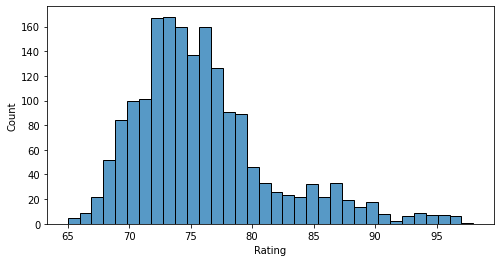

In [627]:
plt.figure(figsize=(8, 4))
sns.histplot(dfly.sort_values(by=['Rating'])['Rating'])

The majority of ratings are between 72 and 77. The distribution is right-skewed.

#### Top Players

In [628]:
# List top 5 players with the higest rating every season
gbs = dfly.set_index('Name').groupby('Season')
a = gbs['Rating'].nlargest(5)
a

Season     Name                 
2016-2017  LeBron James             96
           Stephen Curry            94
           Kevin Durant             93
           Kawhi Leonard            93
           Russell Westbrook        93
2017-2018  LeBron James             97
           Kevin Durant             96
           James Harden             95
           Kawhi Leonard            95
           Stephen Curry            94
2018-2019  LeBron James             98
           Kevin Durant             97
           James Harden             96
           Stephen Curry            95
           Giannis Antetokounmpo    94
2019-2020  LeBron James             97
           Kawhi Leonard            97
           Giannis Antetokounmpo    96
           James Harden             96
           Stephen Curry            95
2020-2021  Giannis Antetokounmpo    97
           LeBron James             97
           James Harden             96
           Kawhi Leonard            96
           Anthony Davis       

LeBron James maintains the highest rating over the past 5 seasons.

## Investigate different factors

#### Team

<AxesSubplot:xlabel='Tm', ylabel='Average Rating'>

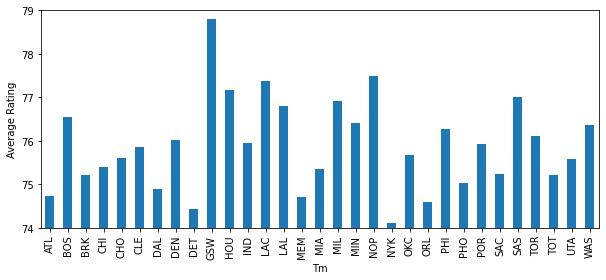

In [629]:
# Average rating for each team
fig, axs = plt.subplots(figsize=(10,4), subplot_kw={'ylim': (74,79)})
gbt = dfly.groupby('Tm')
b = gbt['Rating'].mean()
plt.ylabel("Average Rating")
b.plot.bar()

GSW has the highest average rating among all the NBA teams. This is in accordance with GSW's great performance in the past 5 seasons.

#### Position

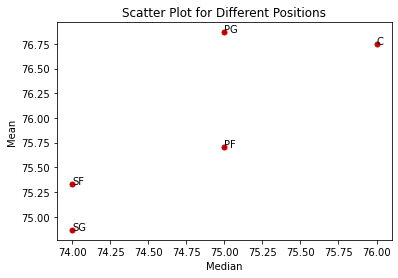

In [630]:
# Mean and median rating of diffferent positions
gbp = dfly.groupby('Pos')
mean = gbp['Rating'].mean()
median = gbp['Rating'].median()

position = ['C','PF','PG','SF','SG']

mm = []
for i in range(0,5):
    a = [mean[i],median[i]]
    mm.append(a)

dfp = pd.DataFrame(mm, index=position, columns=["Mean", "Median"])
fig, ax = plt.subplots()
dfp.plot(kind="scatter", x="Median", y="Mean", ax=ax, s=25, color="#c90000")
plt.title('Scatter Plot for Different Positions')

for i, label in enumerate(position):
    plt.annotate(label, (median[i], mean[i]))

Taking both mean and median into consideration, Center tends to have a higher rating while Shooting Guard tends to have a lower rating. However, I think this is negligible since the difference is too small.

Next I will look for some quantitative factors.

#### Point and Assist

Text(0.5, 1.0, 'Relationship between rating and number of AST')

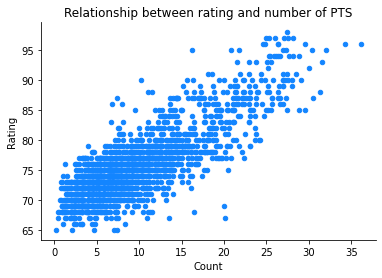

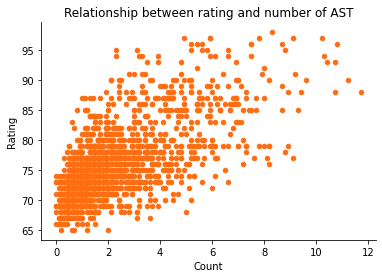

In [631]:
fig, ax = plt.subplots()
dfly.plot(kind='scatter', x='PTS', y='Rating', ax=ax, color='#1385ff')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Count')
plt.title('Relationship between rating and number of PTS')

fig, ax = plt.subplots()
dfly.plot(kind='scatter', x='AST', y='Rating', ax=ax, color='#ff6d13')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Count')
plt.title('Relationship between rating and number of AST')

#### Block and Steal

Text(0.5, 1.0, 'Relationship between rating and BLK/STL')

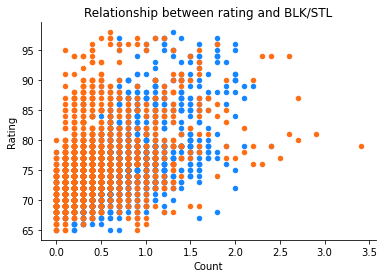

In [632]:
fig, ax = plt.subplots()

dfly.plot(kind='scatter', x='STL', y='Rating', ax=ax, color='#1385ff')
dfly.plot(kind='scatter', x='BLK', y='Rating', ax=ax, color='#ff6d13')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Count')
plt.title('Relationship between rating and BLK/STL')

STL and BLK are both positively related to the rating. They are both important parameters of players' defense ability.

#### Age

<AxesSubplot:xlabel='Age', ylabel='Rating'>

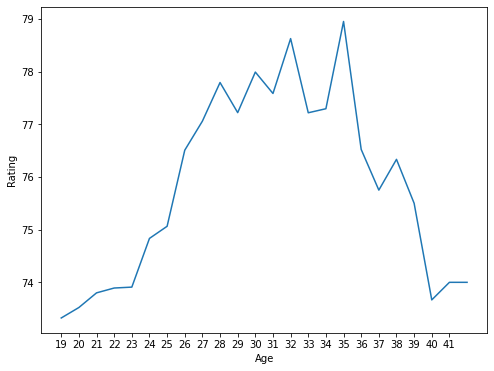

In [633]:
gba = dfly.groupby('Age')
ages = gba['Rating'].mean()
plt.ylabel('Rating')
plt.xticks(np.arange(19, 42, step=1))
ages.plot(figsize=(8,6))

The average rating grows from age 19-30. This can be explained that players are becoming more experienced and keeps improving their skills. However, the average rating drops after age 35 very possibly because players turn to be not as strong and enduring as before.

## Regression

<AxesSubplot:>

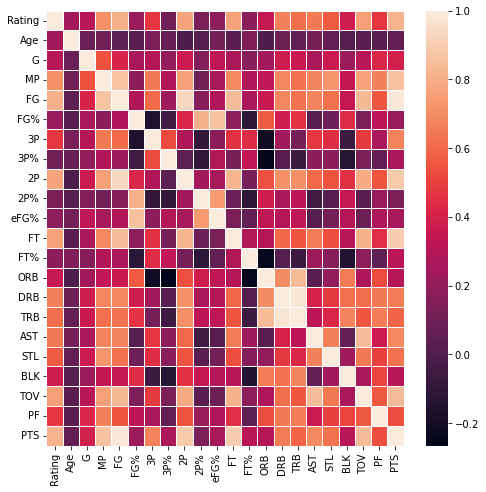

In [634]:
plt.subplots(figsize=(8,8))
sns.heatmap(dfly.corr(),linewidths = 1)

In [635]:
X = dfly.drop(['Rating','Name','Season','Pos','Tm'], axis=1).copy()

for col in list(X):
    X[col] = X[col].astype(float)
X.head()

,Age,G,MP,FG,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,26.0,61.0,33.0,10.3,0.569,1.1,0.303,9.2,0.636,0.600,6.5,0.685,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1
1,36.0,45.0,33.4,9.4,0.513,2.3,0.365,7.1,0.591,0.576,4.0,0.698,0.6,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0
2,31.0,44.0,36.6,7.8,0.466,2.8,0.362,5.0,0.553,0.548,6.3,0.861,0.8,7.1,7.9,10.8,1.2,0.8,4.0,2.3,24.6
3,29.0,52.0,34.1,8.9,0.512,1.9,0.398,7.0,0.557,0.568,5.0,0.885,1.1,5.4,6.5,5.2,1.6,0.4,2.0,1.6,24.8
4,27.0,36.0,32.3,8.4,0.491,0.7,0.260,7.6,0.536,0.512,4.4,0.738,1.7,6.2,7.9,3.1,1.3,1.6,2.1,1.7,21.8


In [636]:
y = np.log(dfly['Rating']).astype(float)
dfly['log_Rating'] = y
y.head()

0    4.574711
1    4.574711
2    4.564348
3    4.564348
4    4.553877
Name: Rating, dtype: float64

#### Simple Linear Regression

We first assume there is only one variable PTS, which I assume is most closely related with ratings.

Fit model: Rating = 4.2318 + 0.0096 PTS


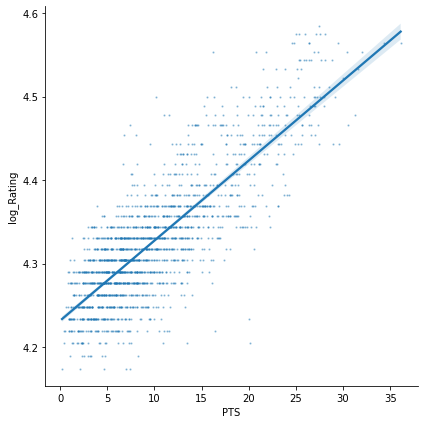

In [637]:
sns.lmplot(data=dfly, x='PTS', y='log_Rating', height=6,scatter_kws=dict(s=1.5, alpha=0.35))

PTS_lr_model = linear_model.LinearRegression()

PTS_lr_model.fit(X[['PTS']], y)

beta_0 = PTS_lr_model.intercept_
beta_1 = PTS_lr_model.coef_[0]

print(f'Fit model: Rating = {beta_0:.4f} + {beta_1:.4f} PTS')

#### Lasso Regression

In [638]:
lasso = linear_model.LassoCV(cv=5).fit(X_train,y_train)
print(-np.log10(lasso.alpha_))
print(lasso.alpha_)

3.40816123745036
0.00039069581798126805


In [639]:
lasso_model = linear_model.Lasso(alpha=lasso.alpha_)
lasso_model.fit(X, y)

lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lr_coefs = pd.Series(dict(zip(list(X), lr_model.coef_)))
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))
coefs

,lasso,linreg
Age,0.003407,0.272449
G,-0.000071,-0.001930
MP,-0.000928,-0.111336
FG,0.000000,-0.162225
FG%,-0.000000,5.359959
3P,-0.000000,-2.607037
3P%,-0.009999,-2.558236
2P,0.001888,-1.855254
2P%,-0.000000,-0.381052
eFG%,-0.000000,-7.288303


We can see 3P% is most negatively correlated (this is not expected before) while BLK is most positively corelated. This is different from my previous assumption that PTS is the most influential variable. However, PTS is still of great significance since it has the second largest positive correlation.

In [640]:
def fit_and_report_mses(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train, y_train)
    return dict(
        mse_train=metrics.mean_squared_error(y_train, mod.predict(X_train)),
        mse_test=metrics.mean_squared_error(y_test, mod.predict(X_test))
    )

n_test = 100
X_train = X.iloc[:n_test, :]
X_test = X.iloc[n_test:, :]
y_train = y.iloc[:n_test]
y_test = y.iloc[n_test:]

In [641]:
fit_and_report_mses(linear_model.LinearRegression(), X_train, X_test, y_train, y_test)

{'mse_train': 0.0007527883905089315, 'mse_test': 0.003944405700635041}

In [642]:
fit_and_report_mses(linear_model.Lasso(alpha=lasso.alpha_), X_train, X_test, y_train, y_test)

{'mse_train': 0.0008718230096317521, 'mse_test': 0.003773189040833236}

Lasso regression is more accurate than linear regression for the test data.

#### Random Forest

In [643]:
param_grid = { 'max_depth': [1, 2, 4, 8, 16, 32, 64, None] } 
rf_grid = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(n_estimators=25), 
                                               param_grid, cv=6, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

rf_best

RandomForestRegressor(max_depth=16, n_estimators=25)

In [644]:
rf_best.fit(X_train, y_train)
ytr_pred=rf_best.predict(X_train)
mse = mean_squared_error(ytr_pred,y_train)
print("MSE_train: %.2f" % mse)

ypred=rf_best.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE_test: %.2f" % mse)

MSE_train: 0.00
MSE_test: 0.01


## Other factors

Apart from the performances on-court, 2K rating is unavoidably affected by other factors. One thing I can think about is social influence. For the simplicity of research, I will quantify the social influence by collecting the amount of players' Instagram followers. Since the effect of this should be quite small for players that are not famous and with low ratings and it is difficult to search for the number players' followers in the past, I will just look for players with the top 10 ratings in the season 2020-2021.

In [645]:
m=dfly.loc[dfly['Season']=='2020-2021'].set_index('Name')
v=m['Rating'].nlargest(10).to_frame()
v

,Rating
Name,
Giannis Antetokounmpo,97
LeBron James,97
James Harden,96
Kawhi Leonard,96
Anthony Davis,95
Kevin Durant,95
Stephen Curry,95
Damian Lillard,94
Joel Embiid,91


Kawhi Leonard will be excluded since he doesn't have an Instagram account.

In [646]:
lst1=v.index.tolist()
lst2=v['Rating'].tolist()
lst3=[11200000,105000000,11500000,None,7000000,12500000,38500000,9400000,5100000,3200000]
dff = pd.DataFrame(list(zip(lst1, lst2, lst3)),columns =['Name', 'Rating','Follower']).dropna()
dff

,Name,Rating,Follower
0,Giannis Antetokounmpo,97,11200000.0
1,LeBron James,97,105000000.0
2,James Harden,96,11500000.0
4,Anthony Davis,95,7000000.0
5,Kevin Durant,95,12500000.0
6,Stephen Curry,95,38500000.0
7,Damian Lillard,94,9400000.0
8,Joel Embiid,91,5100000.0
9,Karl-Anthony Towns,90,3200000.0


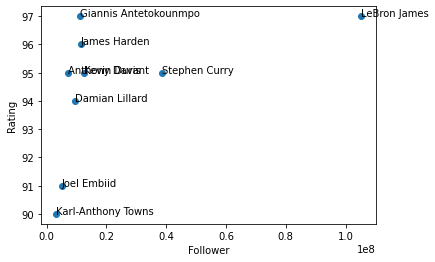

In [647]:
fig, ax = plt.subplots()

ax.scatter(x=dff['Follower'],y=dff['Rating'])
ax.set_xlabel('Follower')
ax.set_ylabel('Rating')

for idx, row in dff.iterrows():
    ax.annotate(row['Name'],(row['Follower'], row['Rating']))

plt.show()

We can see that rating is indeed positively related with the number of followers. This conclusion is not valid enough since we only use one season's data which lack representativeness, but it does provide an insight into this issue.

## Conclusion

In this project, I have learned web scraping as well as improved visualization and regression skills. We can see that 2K rating is indeed closely related with on-court performances. The regression models generally provide a good estimation. Surprisingly, ratings are negatively correlated with 3P%, and they are most positively correlated with BLK instead of PTS. It is also interesting to note how social influence power can affect ratings, which requires further proof.